In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#gamma = ratio of specific heat
UL = float(input('please insert the left value of U:'))
UR = float(input('please insert the right value of U:'))
rho_L = float(input('please insert the left value of density:'))
rho_R = float(input('please insert the right value of density:'))
PL = float(input('please insert the left value of pressure:'))
PR = float(input('please insert the right value of pressure:'))
gamma = float(input('please insert the  value of specific heat ratio:'))
Time  = float(input('please insert the time  between zero and infinity(for example 10):'))
Delta_T = float(input('please insert the time interval between each computing point:'))
X_interval = float(input('please insert the lenght interval.(for example if you put 8 , it will consider +8 to -8:'))
Delta_X = float(input('please insert the x interval between each computing point:'))

please insert the left value of U:2
please insert the right value of U:2
please insert the left value of density:2
please insert the right value of density:3
please insert the left value of pressure:2.5
please insert the right value of pressure:4
please insert the  value of specific heat ratio:1.4
please insert the time  between zero and infinity(for example 10):10
please insert the time interval between each computing point:1
please insert the lenght interval.(for example if you put 8 , it will consider +8 to -8:10
please insert the x interval between each computing point:0.01


In [16]:
AL = 2/((gamma+1)*rho_L)
AR = 2/((gamma+1)*rho_R)
BL = ((gamma-1)/(gamma+1))*PL
BR = ((gamma-1)/(gamma+1))*PR
delta_U = UR - UL
TOL = 10**(-6)
aR = math.sqrt(gamma*PR/rho_R)
aL = math.sqrt(gamma*PL/rho_L)

In [17]:
def function_fL(p):
    if p > PL:
        f = (p-PL)* math.sqrt(AL/(p+BL))
    if p <= PL:
        f = (2*aL/(gamma-1))*(((p/PL)**((gamma-1)/(2*gamma)))-1)
    return f

def function_fR(p):
    if p > PR:
        f = (p-PR)* math.sqrt(AR/(p+BR))
    if p <= PR:
        f = (2*aR/(gamma-1))*(((p/PR)**((gamma-1)/(2*gamma)))-1)
    return f
def function(p):
    
    f= function_fL(p) + function_fR(p) + delta_U
    return f

def function_fL_der(p):
    if p > PL:
        f = (math.sqrt(AL/BL+p))*(1-((p-PL)/(2*(BL+p))))
    if p <= PL:
        f = (1/(rho_L*aL))*(p/PL)**(-(gamma+1)/2*gamma)
    return f

def function_fR_der(p):
    if p > PR:
        f = (math.sqrt(AR/BR+p))*(1-((p-PR)/(2*(BR+p))))
    if p <= PR:
        f = (1/(rho_R*aR))*(p/PR)**(-(gamma+1)/2*gamma)
    return f

def function_der(p):
    f= function_fL_der(p) + function_fR_der(p)
    return f
    

In [18]:

# if the two nonlinear waves are rarefaction , PTR is the exact solution for p* and no iteration is needed.
PTR = ((aL+aR-0.5*(gamma-1)*(UR-UL))/((aL/(PL**((gamma-1)/(2*gamma))))+(aR/(PR**((gamma-1)/(2*gamma))))))**((2*gamma)/(gamma-1))

try:
    pm_PTR = newton_solver(PTR,TOL)[0]
    pm = pm_PTR
except:
    print('The solution is not converged with PTR')
    pm_PTR = np.nan

PPV = 0.5*(PL+PR)-0.125*(UR-UL)*(rho_L +rho_R)*(aL+aR)
p0  = max(PPV,TOL)

try:
    pm_PPV = newton_solver(p0,TOL)[0]
    pm = pm_PPV
except:
    print('The solution is not converged with PPV')
    pm_PPV = np.nan


PTS= (gk(p0,'L')*PL + gk(p0,'R')*PR - delta_U)/(gk(p0,'L') + gk(p0,'R'))
p00 = max(TOL,PTS)

try:
    pm_PTS = newton_solver(p00,TOL)[0]
    pm_PTS
except:
    print('The solution is not converged with PTS')
    pm_PTS = np.nan
    
p000 = 0.5*(PL+PR)

try:
    pm_average = newton_solver(p000,TOL)[0]
    pm = pm_average
except:
    print('The solution is not converged with average estimation')
    pm_average = np.nan

print('the converged solution with PTR initial guess:{}'.format(pm_PTR))
print('the converged solution with PPV initial guess:{}'.format(pm_PPV))
print('the converged solution with PTS initial guess:{}'.format(pm_PTS))
print('the converged solution with average initial guess:{}'.format(pm_average))



the converged solution with PTR initial guess:3.1615529999185896
the converged solution with PPV initial guess:3.1615532530842496
the converged solution with PTS initial guess:3.1615530110225554
the converged solution with average initial guess:3.1615532530842496


In [19]:
Um = 0.5*(UL+UR)+ 0.5*(function_fR(pm)-function_fL(pm))
Um

1.7742517572617027

In [6]:
def gk(p,x):
    if x=='L':
        f = math.sqrt(AL/(p+BL))
    if x=='R':
        f = math.sqrt(AR/(p+BR))
    return f

In [7]:
def newton_solver(guess,TOL):
    x1 = guess+1
    x2 = guess
    i=0
    while abs(x1-x2) > TOL:
        i=i+1
        x1 = x2
        x2 = x1 - (function(x1)/function_der(x1))
        
    return x2,i

In [20]:
T = np.arange(0,Time,Delta_T)
X = np.arange(-X_interval,X_interval+1,Delta_X)

In [19]:
#############################################################################################################################
#In this condition the left wave is a shock wave.
if pm > PL:
    SL = UL-aL*((((gamma+1)/(2*gamma))*(pm/PL)) + ((gamma-1)/(2*gamma)))**0.5
    rho_m_L = rho_L*(((pm/PL)+((gamma-1)/(gamma+1)))/((((gamma-1)/(gamma+1))*(pm/PL))+1))
    
#In this condition the left wave is a rarefaction wave.
if pm < PL:
    rho_m_L = rho_L*(pm/PL)**(1/gamma)
    a_m_L = aL*(pm/PL)**((gamma-1)/(2*gamma))
    SHL = (UL - aL)
    STL = (Um-a_m_L)
    
    #inside the rarefaction fan the variables are defined in this manner : 
    rho = rho_L((2/(gamma+1))+((gamma-1)/((gamma+1)*aL))*(UL-(x/t)))**(2/(gamma-1))
    U = (2/(gamma+1))*(aL+(((gamma-1)/2)*UL)+(x/t))
    p = PL*((2/(sigma+1)) + ((sigma-1)/((sigma+1)*aL))*(UL-(x/t)))**(2*gamma/(gamma-1))
    

#In this condition the right wave is a shock wave.
if pm > PR:
    SR = UR+aR*((((gamma+1)/(2*gamma))*(pm/PR)) + ((gamma-1)/(2*gamma)))**0.5
    rho_m_R = rho_R*(((pm/PR)+((gamma-1)/(gamma+1)))/((((gamma-1)/(gamma+1))*(pm/PR))+1))
    
#In this condition the left wave is a rarefaction wave.
if pm < PR:
    
    rho_m_R = rho_R*(pm/PR)**(1/gamma)
    a_m_R = aR*(pm/PR)**((gamma-1)/(2*gamma))
    SHR = (UR + aR)
    STR = (Um + a_m_R)
    
    #inside the rarefaction fan the variables are defined in this manner :
    
    #inside the rarefaction fan the variables are defined in this manner : 
    rho = rho_R((2/(gamma+1))-((gamma-1)/((gamma+1)*aR))*(UR-(x/t)))**(2/(gamma-1))
    U = (2/(gamma+1))*(-aR+(((gamma-1)/2)*UR)+(x/t))
    p = PR*((2/(sigma+1)) - ((sigma-1)/((sigma+1)*aR))*(UR-(x/t)))**(2*gamma/(gamma-1))
##############################################################################################################

1691.4884751763464

In [21]:
U1_columns = []
for x in X:
    U1_columns.append('U_{}'.format(int(x)))
U2_columns = []
for x in X:
    U2_columns.append('U_{}'.format(int(x)))
U3_columns = []
for x in X:
    U3_columns.append('U_{}'.format(int(x)))
    
U1_database =  pd.DataFrame(columns=U1_columns)
U1_database = pd.concat([U1_database,pd.DataFrame(columns=U1_columns,data=X.reshape(1,np.shape(X)[0]))],axis=0)
U2_database =  pd.DataFrame(columns=U2_columns)
U2_database = pd.concat([U2_database,pd.DataFrame(columns=U2_columns,data=X.reshape(1,np.shape(X)[0]))],axis=0)
U3_database =  pd.DataFrame(columns=U3_columns)
U3_database = pd.concat([U3_database,pd.DataFrame(columns=U3_columns,data=X.reshape(1,np.shape(X)[0]))],axis=0)



#In the case of two shock wave    
if (pm > PL) and (pm > PR):
    
    print('All_shock_wave')
    
    SL = UL-aL*((((gamma+1)/(2*gamma))*(pm/PL)) + ((gamma-1)/(2*gamma)))**0.5
    SR = UR+aR*((((gamma+1)/(2*gamma))*(pm/PR)) + ((gamma-1)/(2*gamma)))**0.5
    
    rho_m_R = rho_R*(((pm/PR)+((gamma-1)/(gamma+1)))/((((gamma-1)/(gamma+1))*(pm/PR))+1))
    a_m_R = aR*(pm/PR)**((gamma-1)/(2*gamma))
    rho_m_L = rho_L*(((pm/PL)+((gamma-1)/(gamma+1)))/((((gamma-1)/(gamma+1))*(pm/PL))+1))
    a_m_L = aL*(pm/PL)**((gamma-1)/(2*gamma))
    
   
    
    for t in T:
        
        U1 = np.array([0])   #### rho
        U2 = np.array([0])   #### U
        U3 = np.array([0])   #### P
        
        for x in X:
            
            if (x==0) and (t==0):
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
            
            if (x/t)>SR: 
                
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
                U3 = np.append(U3,PR)
                
            if ((x/t)<SR) and ((x/t)>Um):
                
                U1 = np.append(U1,rho_m_R)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                
            if ((x/t) < Um) and ((x/t) > SL):
                
                U1 = np.append(U1,rho_m_L)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                
            if ((x/t) < SL):
                
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
                U3 = np.append(U3,PL)
                
            if ((x/t)==SR) or ((x/t)==SL) or ((x/t)==Um):
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                
        U1 = U1[1:]
        U2 = U2[1:]
        U3 = U3[1:]
        U1=U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2=U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
        U3 = U3.reshape(1,np.shape(X)[0])
        U3 = pd.DataFrame(columns=U3_columns,data = U3)
        U3_database=pd.concat([U3_database,U3],axis=0)
        
#In the case of two rarefaction wave
if (pm < PL) and (pm < PR):
    
    print('All_Rarefaction_wave')
    
    
    rho_m_L = rho_L*(pm/PL)**(1/gamma)
    a_m_L = aL*(pm/PL)**((gamma-1)/(2*gamma))
    SHL = (UL - aL)
    STL = (Um - a_m_L)
    
    rho_m_R = rho_R*(pm/PR)**(1/gamma)
    a_m_R = aR*(pm/PR)**((gamma-1)/(2*gamma))
    SHR = (UR + aR)
    STR = (Um + a_m_R)
    
    for t in T:
        
        U1 = np.array([0])   #### rho
        U2 = np.array([0])   #### U
        U3 = np.array([0])   #### P
        
        for x in X:
            
            if (x==0) and (t==0):
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                
            if (x/t) > SHR:
                
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
                U3 = np.append(U3,PR)
            
            if ((x/t) > STR) and ((x/t) < SHR):
                
                U1 = np.append(U1,rho_R*((2/(gamma+1))-((gamma-1)/((gamma+1)*aR))*(UR-(x/t)))**(2/(gamma-1)))
                U2 = np.append(U2,(2/(gamma+1))*(-aR+(((gamma-1)/2)*UR)+(x/t)))
                U3 = np.append(U3,PR*((2/(gamma+1)) - ((gamma-1)/((gamma+1)*aR))*(UR-(x/t)))**(2*gamma/(gamma-1)))
                
            if ((x/t) < STR) and ((x/t) > Um):
                
                U1 = np.append(U1,rho_m_R)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                
            if ((x/t) > STL) and ((x/t) < Um):
                
                U1 = np.append(U1,rho_m_L)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                
            if ((x/t) > SHL) and ((x/t) < STL):
                
                U1 = np.append(U1,rho_L*((2/(gamma+1))+((gamma-1)/((gamma+1)*aL))*(UL-(x/t)))**(2/(gamma-1)))
                U2 = np.append(U2,(2/(gamma+1))*(aL+(((gamma-1)/2)*UL)+(x/t)))
                U3 = np.append(U3,PL*((2/(gamma+1)) + ((gamma-1)/((gamma+1)*aL))*(UL-(x/t)))**(2*gamma/(gamma-1)))
                
            if (x/t) < SHL:
                
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
                U3 = np.append(U3,PL)
                
            if ((x/t)==SHR) or ((x/t)==STR) or ((x/t)==Um) or ((x/t)==SHL) or  ((x/t)==STL):
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                
        U1 = U1[1:]
        U2 = U2[1:]
        U3 = U3[1:]
        U1=U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2=U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
        U3 = U3.reshape(1,np.shape(X)[0])
        U3 = pd.DataFrame(columns=U3_columns,data = U3)
        U3_database=pd.concat([U3_database,U3],axis=0)
                
#In the case of shock_rarefaction waves
if (pm > PL) and (pm < PR):
    
    print('Shock_rarefaction_waves')
    
    SL = UL-aL*((((gamma+1)/(2*gamma))*(pm/PL)) + ((gamma-1)/(2*gamma)))**0.5
    
    rho_m_R = rho_R*(pm/PR)**(1/gamma)
    a_m_R = aR*(pm/PR)**((gamma-1)/(2*gamma))
    rho_m_L = rho_L*(((pm/PL)+((gamma-1)/(gamma+1)))/((((gamma-1)/(gamma+1))*(pm/PL))+1))
    a_m_L = aL*(pm/PL)**((gamma-1)/(2*gamma))
    
    
    SHR = (UR + aR)
    STR = (Um + a_m_R)
    
    for t in T:
        
        U1 = np.array([0])   #### rho
        U2 = np.array([0])   #### U
        U3 = np.array([0])   #### P
        
        for x in X:
            
            if (x==0) and (t==0):
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                
            if (x/t) > SHR:
                
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
                U3 = np.append(U3,PR)
            
            if ((x/t) > STR) and ((x/t) < SHR):
                
                U1 = np.append(U1,rho_R*((2/(gamma+1))-((gamma-1)/((gamma+1)*aR))*(UR-(x/t)))**(2/(gamma-1)))
                U2 = np.append(U2,(2/(gamma+1))*(-aR+(((gamma-1)/2)*UR)+(x/t)))
                U3 = np.append(U3,PR*((2/(gamma+1)) - ((gamma-1)/((gamma+1)*aR))*(UR-(x/t)))**(2*gamma/(gamma-1)))
                
            if ((x/t) < STR) and ((x/t) > Um):
                
                U1 = np.append(U1,rho_m_R)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                
            if ((x/t) < Um) and ((x/t) > SL):
                
                U1 = np.append(U1,rho_m_L)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                
            if ((x/t) < SL):
                
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
                U3 = np.append(U3,PL)
                
            if ((x/t)==STR) or ((x/t)==SL) or ((x/t)==Um) or ((x/t)==SHR):
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                
        U1 = U1[1:]
        U2 = U2[1:]
        U3 = U3[1:]
        U1=U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2=U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
        U3 = U3.reshape(1,np.shape(X)[0])
        U3 = pd.DataFrame(columns=U3_columns,data = U3)
        U3_database=pd.concat([U3_database,U3],axis=0)


#In the case of rarefaction_shock waves
if (pm < PL) and (pm > PR):
    
    print('rarefaction_shock_waves')
    
    SR = UR+aR*((((gamma+1)/(2*gamma))*(pm/PR)) + ((gamma-1)/(2*gamma)))**0.5
    
    rho_m_R = rho_R*(((pm/PR)+((gamma-1)/(gamma+1)))/((((gamma-1)/(gamma+1))*(pm/PR))+1))
    a_m_R = aR*(pm/PR)**((gamma-1)/(2*gamma))
    rho_m_L = rho_L*(pm/PL)**(1/gamma)
    a_m_L = aL*(pm/PL)**((gamma-1)/(2*gamma))
    
    SHL = (UL - aL)
    STL = (Um - a_m_L)
    
    for t in T:
        
        U1 = np.array([0])   #### rho
        U2 = np.array([0])   #### U
        U3 = np.array([0])   #### P
        
        for x in X:
            
            if (x==0) and (t==0):
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
            
            if (x/t)>SR: 
                
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
                U3 = np.append(U3,PR)
                
            if ((x/t)<SR) and ((x/t)>Um):
                
                U1 = np.append(U1,rho_m_R)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                
            if ((x/t) > STL) and ((x/t) < Um):
                
                U1 = np.append(U1,rho_m_L)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                
            if ((x/t) > SHL) and ((x/t) < STL):
                
                U1 = np.append(U1,rho_L*((2/(gamma+1))+((gamma-1)/((gamma+1)*aL))*(UL-(x/t)))**(2/(gamma-1)))
                U2 = np.append(U2,(2/(gamma+1))*(aL+(((gamma-1)/2)*UL)+(x/t)))
                U3 = np.append(U3,PL*((2/(gamma+1)) + ((gamma-1)/((gamma+1)*aL))*(UL-(x/t)))**(2*gamma/(gamma-1)))
                
            if (x/t) < SHL:
                
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
                U3 = np.append(U3,PL)
                
            if (x/t)==Um or (x/t)==SHL or (x/t)==STL or (x/t)==SR:
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                
        U1 = U1[1:]
        U2 = U2[1:]
        U3 = U3[1:]
        U1=U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2=U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
        U3 = U3.reshape(1,np.shape(X)[0])
        U3 = pd.DataFrame(columns=U3_columns,data = U3)
        U3_database=pd.concat([U3_database,U3],axis=0)
                
    
    
    

                
        
    
    
U1_database.set_index(np.append(np.array(['x']),T),inplace=True)
U2_database.set_index(np.append(np.array(['x']),T),inplace=True) 
U3_database.set_index(np.append(np.array(['x']),T),inplace=True)

Shock_rarefaction_waves


C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:206: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:212: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:218: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:224: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:230: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:236: RuntimeWarning: divide by zero encountered in double_scalars


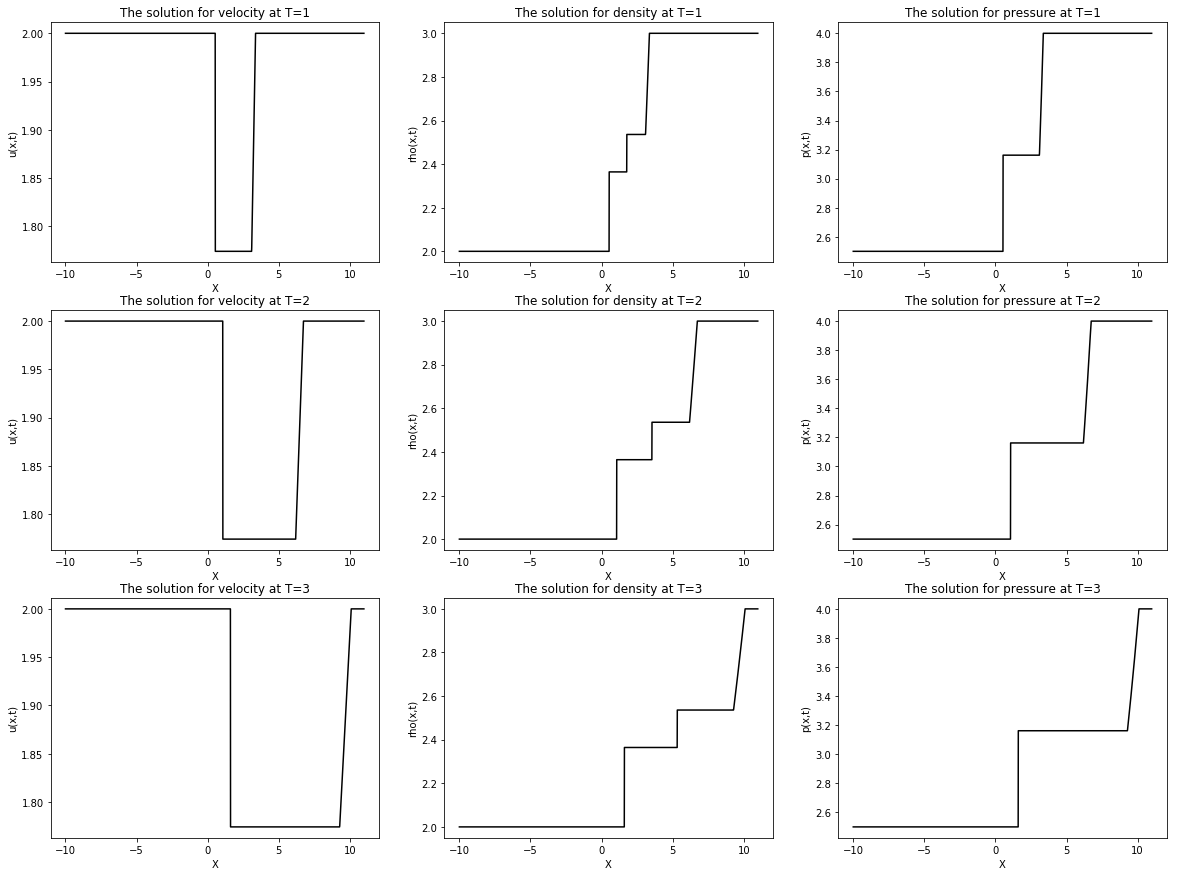

In [22]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(20,15))
axes[0,2].plot(U3_database.iloc[0],U3_database.iloc[2],'black')
axes[1,2].plot(U3_database.iloc[0],U3_database.iloc[3],'black')
axes[2,2].plot(U3_database.iloc[0],U3_database.iloc[4],'black')
axes[0,1].plot(U1_database.iloc[0],U1_database.iloc[2],'black')
axes[1,1].plot(U1_database.iloc[0],U1_database.iloc[3],'black')
axes[2,1].plot(U1_database.iloc[0],U1_database.iloc[4],'black')
axes[0,0].plot(U2_database.iloc[0],U2_database.iloc[2],'black')
axes[1,0].plot(U2_database.iloc[0],U2_database.iloc[3],'black')
axes[2,0].plot(U2_database.iloc[0],U2_database.iloc[4],'black')

axes[0,0].set_title('The solution for velocity at T=1')
axes[0,0].set_xlabel('X')
axes[0,0].set_ylabel('u(x,t)')

axes[1,0].set_title('The solution for velocity at T=2')
axes[1,0].set_xlabel('X')
axes[1,0].set_ylabel('u(x,t)')

axes[2,0].set_title('The solution for velocity at T=3')
axes[2,0].set_xlabel('X')
axes[2,0].set_ylabel('u(x,t)')


axes[0,1].set_title('The solution for density at T=1')
axes[0,1].set_xlabel('X')
axes[0,1].set_ylabel('rho(x,t)')

axes[1,1].set_title('The solution for density at T=2')
axes[1,1].set_xlabel('X')
axes[1,1].set_ylabel('rho(x,t)')

axes[2,1].set_title('The solution for density at T=3')
axes[2,1].set_xlabel('X')
axes[2,1].set_ylabel('rho(x,t)')

axes[0,2].set_title('The solution for pressure at T=1')
axes[0,2].set_xlabel('X')
axes[0,2].set_ylabel('p(x,t)')

axes[1,2].set_title('The solution for pressure at T=2')
axes[1,2].set_xlabel('X')
axes[1,2].set_ylabel('p(x,t)')

axes[2,2].set_title('The solution for pressure at T=3')
axes[2,2].set_xlabel('X')
axes[2,2].set_ylabel('p(x,t)')
plt.savefig('r1.png')

plt.show()

In [105]:
U1_database.to_csv('density1.csv')
U2_database.to_csv('velocity1.csv')
U3_database.to_csv('pressure1.csv')